# Loading the Data 

In [173]:
import numpy as np 
import pandas as pd

df = pd.read_csv('project_005/housing.csv')
X,y  = df.loc[:,df.columns != 'median_house_value'] , df.loc[:,'median_house_value']
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# Exploring the Data 

## Looking for columns with null data 
_total_bedrooms_ contains missing values, that could be replaced with the mean 

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [182]:
X.isna().sum()
X['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [162]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


## Exploring Categorical Data in the Dataset 

In [163]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Looking for columns with fewer values 
_ocean_proximity_ represents categorical values that should be HotEncoded  

In [164]:
X.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
ocean_proximity           5
dtype: int64

## Looking for duplicates 

In [165]:
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(X[dups])

False
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []


## Exploring Correlations 

In [166]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

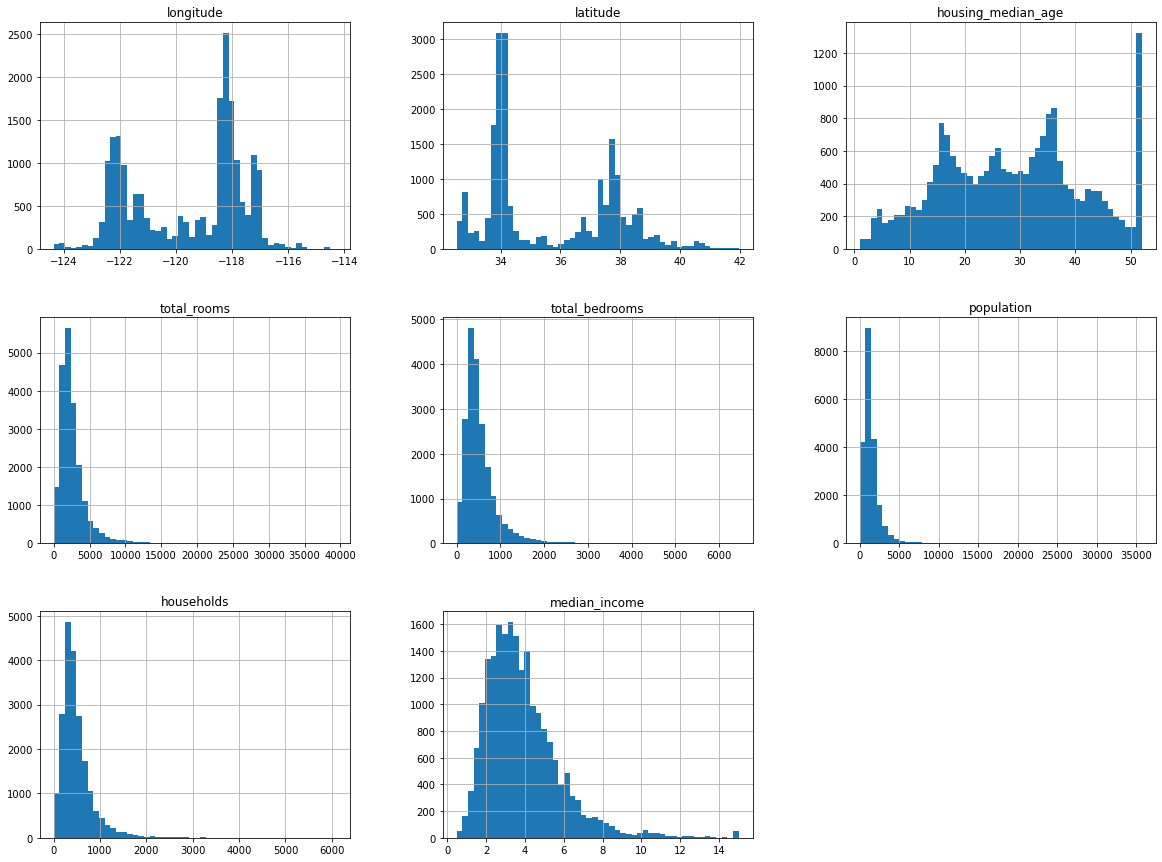

In [167]:
%matplotlib inline 
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

# Applying Transformations 
List of transformations that could be considered :
- Completion of missing values in total_bedrooms 
- HotEncode ocean_proximity 
- Detect Outliers 
- Apply a Feature selection method 

In [221]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

num_cols = list(X.columns)
num_cols.remove('ocean_proximity')

cat_attribs = []
nan_attribs = []




numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler())
    ])

categorical_pipeline = Pipeline([
    ("hot_encoder", OneHotEncoder(), ) 
])


final_pipeline = ColumnTransformer([
    ('num_pip', numerical_pipeline, num_cols),
    ('cat_pip', categorical_pipeline, ['ocean_proximity'])
    ])



full_pipeline_with_predictor = Pipeline([
        ("data_prep",final_pipeline ),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(X, y)

full_pipeline_with_predictor.get_params()


{'memory': None,
 'steps': [('data_prep',
   ColumnTransformer(transformers=[('num_pip',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler()),
                                                    ('minmax_scaler',
                                                     MinMaxScaler())]),
                                    ['longitude', 'latitude', 'housing_median_age',
                                     'total_rooms', 'total_bedrooms', 'population',
                                     'households', 'median_income']),
                                   ('cat_pip',
                                    Pipeline(steps=[('hot_encoder',
                                                     OneHotEncoder())]),
                                    ['ocean_proximit

In [227]:
from sklearn.model_selection import train_test_split
grid_params = [{'data_prep__num_pip__std_scaler': ['passthrough']}, 
               {'data_prep__num_pip__minmax_scaler': ['passthrough']}
                ]

gs = GridSearchCV(full_pipeline_with_predictor, grid_params, scoring='r2')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# run gridsearch
gs.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', gs.best_params_)
print('Grid best score (accuracy): ', gs.best_score_)

gs.best_estimator_.score(X_tes)

Grid best parameter (max. accuracy):  {'data_prep__num_pip__std_scaler': 'passthrough'}
Grid best score (accuracy):  0.6455152394733912


Pipeline(steps=[('data_prep',
                 ColumnTransformer(transformers=[('num_pip',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   'passthrough'),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                